* Mujoco 실행 및 변수 확인용

필요 패키지 삽입

In [1]:
import numpy as np
import mujoco
import os
import pathlib
import mediapy as media

In [2]:
__location__ = os.getcwd()
__location__ = pathlib.Path(__location__)
__model_location__ = __location__.joinpath('horcrux_terrain_v1').joinpath('horcrux_terrain_v1').joinpath('resources')
__model_path__ = os.path.join(__model_location__,'horcrux_plane_obstacle.xml')

model = mujoco.MjModel.from_xml_path(__model_path__)
data = mujoco.MjData(model)

mujoco.mj_forward(model, data)

In [6]:
# data.geom('pvc_pipe').xpos = [3.5, 0, 1]
# data.geom('pvc_pipe').xpos

color_r = [1.0, 0.4, 0.4, 0.7]
color_b = [0.4, 0.4, 1.0, 0.7]
obstacle_binary = [np.random.randint(0, 2) for _ in range(8)]

for i, binary in enumerate(obstacle_binary):
    if binary:
        model.geom(f"pvc_pipe{i+1}").rgba = color_r
        model.geom(f"pvc_pipe{i+1}").pos[2] = 0.025
    else:
        model.geom(f"pvc_pipe{i+1}").rgba = color_b
        model.geom(f"pvc_pipe{i+1}").pos[2] = 0.75

In [7]:
# mujoco.mj_forward(model, data)
mujoco.mj_step(model, data)

""

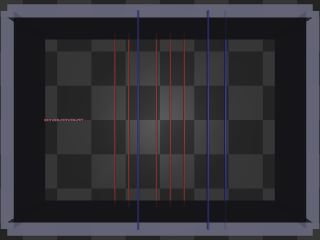

In [8]:
with mujoco.Renderer(model) as renderer:
  renderer.update_scene(data, camera="ceiling")
  media.show_image(renderer.render())

In [84]:
model.geom('pvc_pipe1').pos[2] = 0.025

In [ ]:
xpos_low = -19
xpos_high = 19

x_xpos = np.random.uniform(low=xpos_low, high=xpos_high)
y_xpos = np.random.uniform(low=xpos_low, high=xpos_high)

data.qpos
